# Nigerian Music scraped from Spotify - an analysis

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


We will focus only on 3 genres. Maybe we can get 3 clusters built!

Text(0.5, 1.0, 'Top genres')

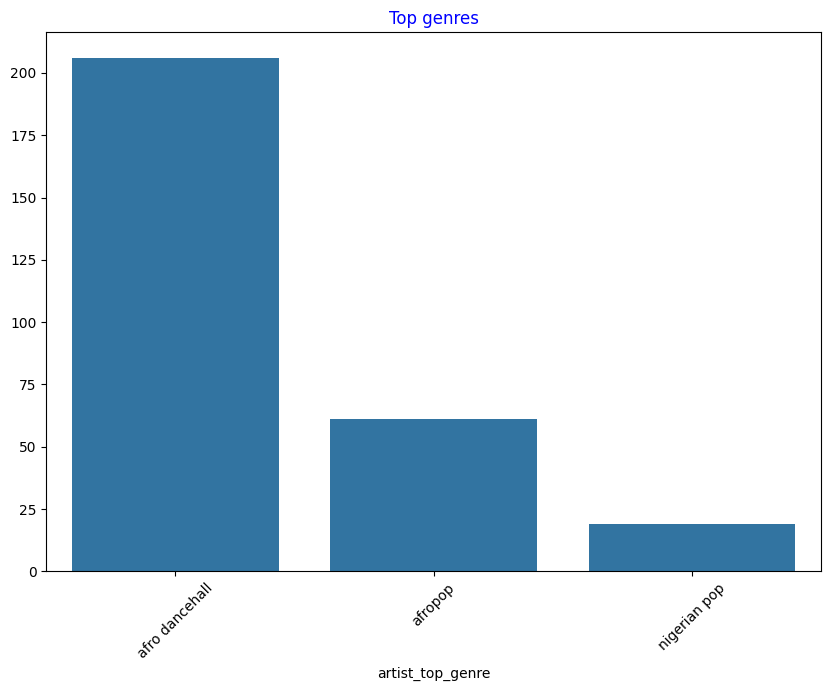

In [3]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [4]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [5]:
df.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

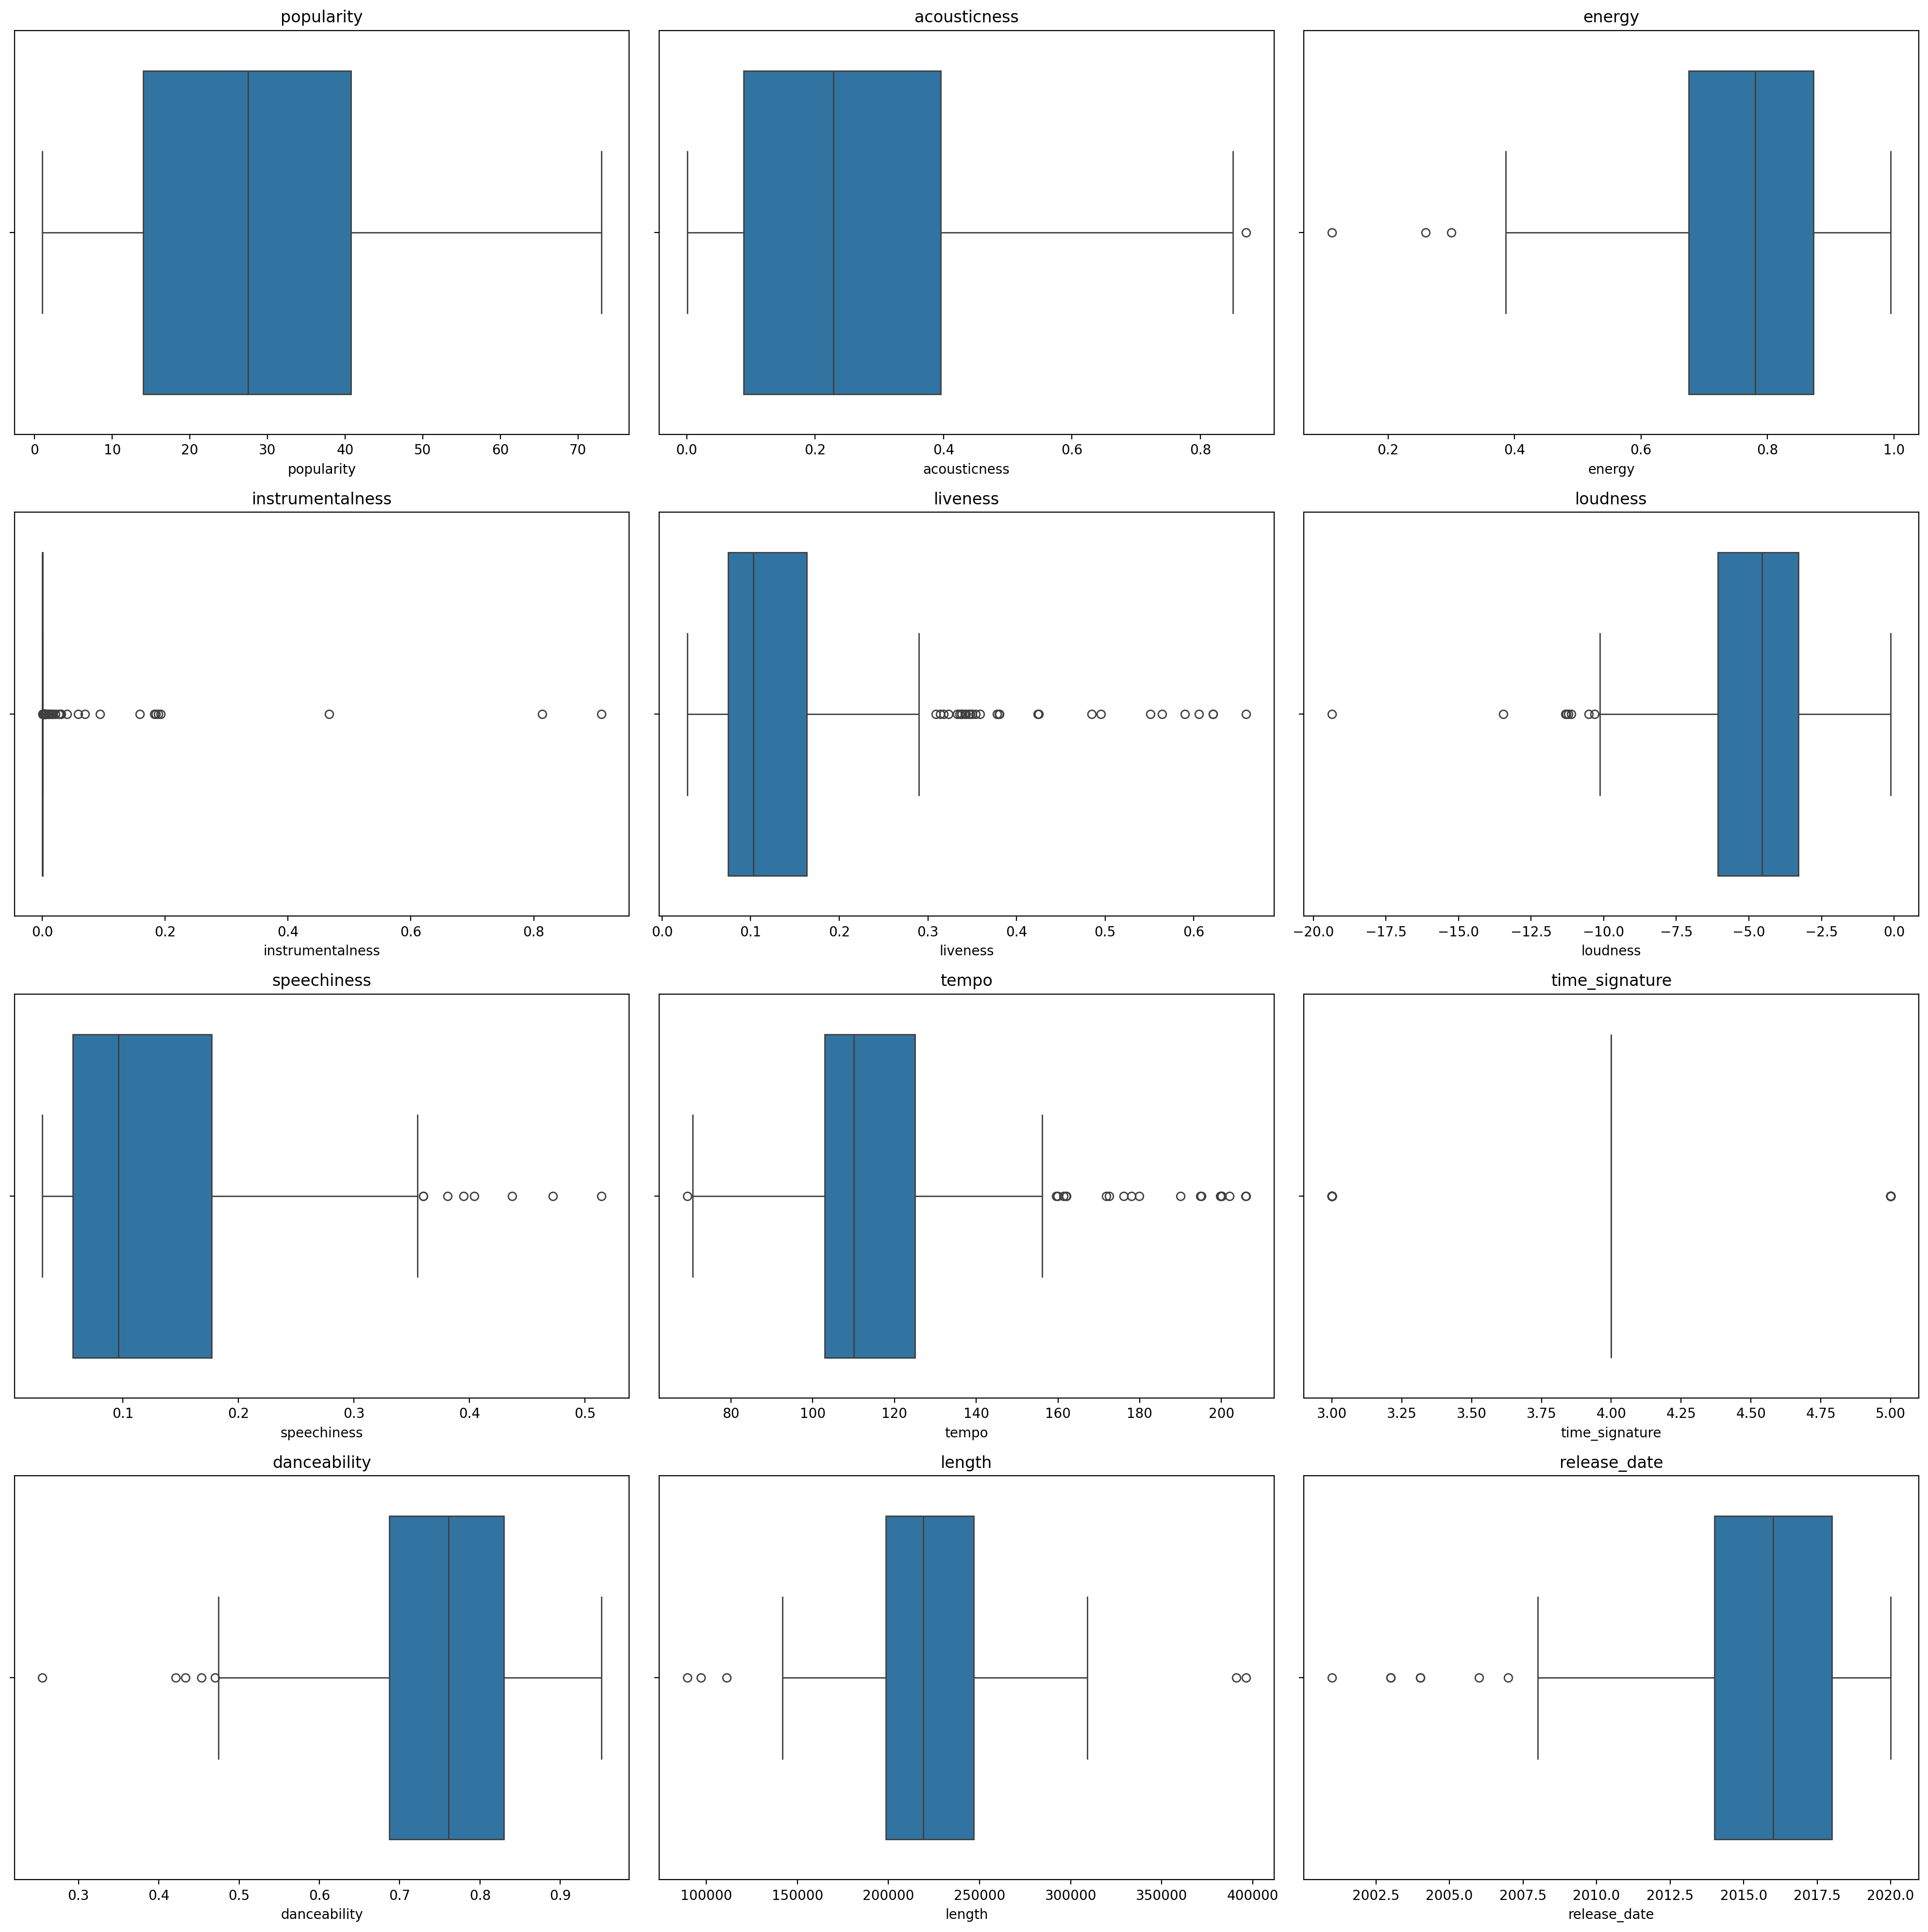

In [6]:
selectedColumns = [
    "popularity",
    "acousticness",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "time_signature",
    "danceability",
    "length",
    "release_date",
]

plt.figure(figsize=(20,20), dpi=200)

for i, colName in enumerate(selectedColumns):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = colName, data = df)
    plt.title(colName)
    
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]
y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])
y = le.transform(y)

In [8]:
X

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
1,1,30,0.710,0.0822,-5.640,0.683
3,2,14,0.894,0.7980,-4.961,0.611
4,1,25,0.702,0.1160,-6.044,0.833
5,2,26,0.803,0.1270,-10.034,0.525
6,2,29,0.818,0.4520,-9.840,0.587
...,...,...,...,...,...,...
514,0,20,0.838,0.0358,-3.723,0.931
515,0,14,0.786,0.1950,-4.232,0.806
519,1,2,0.879,0.2240,-4.602,0.916
522,0,26,0.863,0.0366,-3.130,0.896


In [9]:
y

array([1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [10]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

y_cluster_means = km.predict(X)
y_cluster_means

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0],
      dtype=int32)

In [11]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_means)
score

np.float64(0.5466747351275563)

In [12]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [13]:
print(wcss)

[91386.6567935086, 28634.20520593767, 13100.549391531442, 8690.962997542894, 6003.210058960908, 4619.7425632240365, 3988.205131011305, 3545.0647132553754, 3286.8611110542574, 3043.2626421547793]


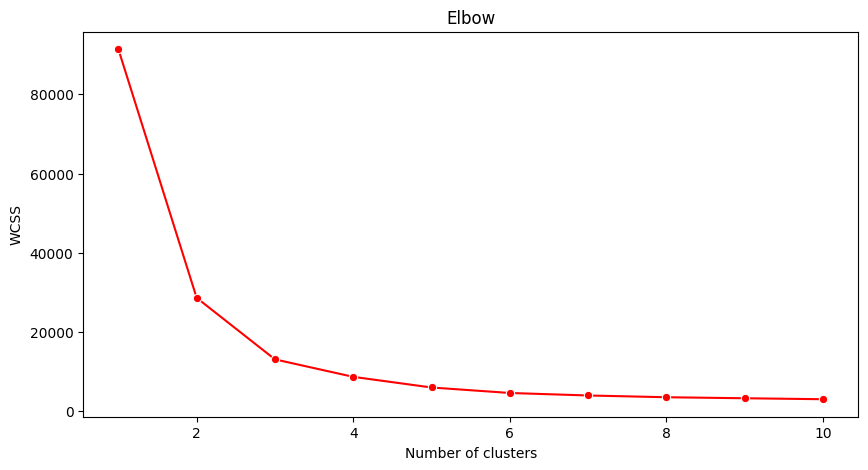

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

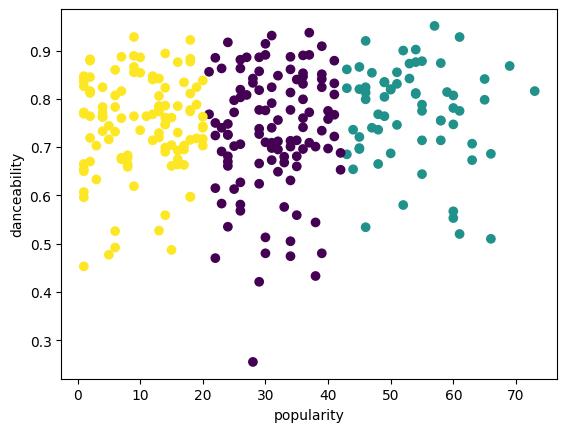

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'], df['danceability'], c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')

plt.show()

In [16]:
X

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
1,1,30,0.710,0.0822,-5.640,0.683
3,2,14,0.894,0.7980,-4.961,0.611
4,1,25,0.702,0.1160,-6.044,0.833
5,2,26,0.803,0.1270,-10.034,0.525
6,2,29,0.818,0.4520,-9.840,0.587
...,...,...,...,...,...,...
514,0,20,0.838,0.0358,-3.723,0.931
515,0,14,0.786,0.1950,-4.232,0.806
519,1,2,0.879,0.2240,-4.602,0.916
522,0,26,0.863,0.0366,-3.130,0.896


In [17]:
from sklearn.preprocessing import RobustScaler, StandardScaler

colsToScale = ['popularity', 'danceability','acousticness', 'loudness', 'energy']
X[colsToScale] = RobustScaler().fit_transform(X[colsToScale])
X[colsToScale] = StandardScaler().fit_transform(X[colsToScale])

In [18]:
X = X.drop(['artist_top_genre'], axis=1)
X

,popularity,danceability,acousticness,loudness,energy
1,0.103108,-0.317618,-0.900167,-0.299633,-0.547502
3,-0.800765,1.324745,2.625895,-0.016548,-1.049536
4,-0.179352,-0.389025,-0.733667,-0.468066,0.498401
5,-0.122860,0.512490,-0.679481,-2.131551,-1.649188
6,0.046616,0.646378,0.921484,-2.050670,-1.216881
...,...,...,...,...,...
514,-0.461812,0.824896,-1.128736,0.499591,1.181725
515,-0.800765,0.360749,-0.344510,0.287382,0.310138
519,-1.478669,1.190857,-0.201654,0.133124,1.077134
522,-0.122860,1.048043,-1.124795,0.746821,0.937681


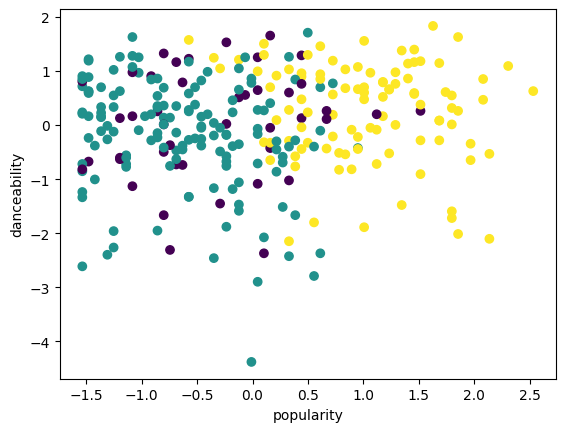

In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

labels = model.predict(X)
plt.scatter(X['popularity'],X['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [20]:
labels = kmeans.labels_
correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 112 out of 286 samples were correctly labeled.
Accuracy score: 0.39


In [24]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = spectral.fit_predict(X)

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 137 out of 286 samples were correctly labeled.
Accuracy score: 0.48


In [25]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)
labels = birch.fit_predict(X)

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 97 out of 286 samples were correctly labeled.
Accuracy score: 0.34


In [26]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=3)
labels = optics.fit_predict(X)

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 7 out of 286 samples were correctly labeled.
Accuracy score: 0.02


In [27]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation()
labels = af.fit_predict(X)

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 18 out of 286 samples were correctly labeled.
Accuracy score: 0.06


In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
db.fit(X)
labels = db.labels_

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))

Result: 0 out of 286 samples were correctly labeled.
Accuracy score: 0.00


Result: 137 out of 286 samples were correctly labeled.
Accuracy score: 0.48


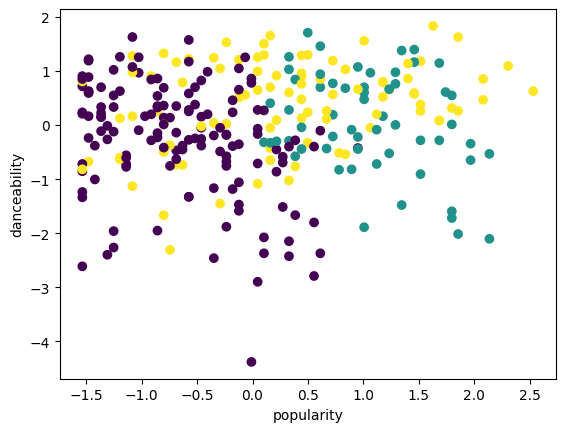

In [32]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
labels = spectral.fit_predict(X)

correct_labels = labels[labels==y]

print("Result: %d out of %d samples were correctly labeled." % (len(correct_labels), y.size))

print('Accuracy score: {0:0.2f}'. format(len(correct_labels)/float(y.size)))
plt.scatter(X['popularity'],X['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()